### Decision Tree in Machine Learning
A decision treee is a supervised learning algorithm used for both **classification** and **regression** tasks. It has a hierarchical tree structure which consists of a root node, branches, internal nodes and leaf nodes. It works like a flowchart help to make decision step by step where:
- `Root Node`: Starting point representing the whole dataset.
- `Branches`: Lines connecting nodes showing the flow from one decision to another.
- `Internal Nodes`: Points where decision are made based on data features.
- `Leaf Nodes`: End points of the tree where the final decision or prediction is made.

A Decision Tree alse helps with decision-making by showing possible outcomes clearly. By looking at the "branches" we can quickly compare options and figure out the best choice.

There are mainly two types of Decision Trees based on the target variable:
1. `Classification Trees`: Used for predicting categorical outcomes like spam or not spam. These trees split the data based on features to classify data into predefined categories.
2. `Regression Trees`: Used for predicting continuous outcomes like predicting house prices. Instead of assigning categories, it provides numerical predictions based on the input features.

### How Decision Trees work?
1. `Start with the Root Node`: It begins with a main question at the root node which is derived from the dataset's features.
2. `Ask Yes/No Question`: From the root, the tree asks a series of yes/no question to split the data into subsets based on specific attributes.
3. `Branching Based on Answers`: Each question leads to different branches:
     - If the answer is yes, the tree follows one path.
     - If the answer is no, the tree follows another path.
4. `Continue Splitting`: This branching continues through further decisions helps in reducing the data down step-by-step.
5. `Reach the Leaf Node`: The process ends when there are no more useful question to ask leading to the leaf node where the final decision or prediction is made.

<img src="Images/Decision-Tree-Example.webp" width=600>

### Purity
#### What is Purity?
In decision trees, **purity** refers to how homogeneous (similar) the samples are within a node:
  - A pure node means all samples belong to the same class.
  - An impure node means samples are mixed across different classes.

Purity tell us **how well a split separates the data**. The goal of a good split is to make child nodes more pure than the parent.

#### Why is Purity important?
- Purity measyres help us decide which feature to split on.
- A good split reduces **uncertainty** about the class label.
- It ensures that the tree becomes more **informative** and less **chaotic** as it grows.

#### Measures of Purity
1. `Entropy (ID3, C4.5)`
  $$
  Entropy(S) = - \sum_{i=1}^{k} p_{i} log_{2}(p_{i})
  $$
  - $p_{i}$ = proportion of samples of class i in node S.
  - **Meaning**: Entropy measures **disorder/uncertainty**.
    - High entropy $\rightarrow$ mixed classes (impure).
    - Low entropy $\rightarrow$ mostly one class (pure).
  
    Example:
   - Node has 50% A and 50% B $\rightarrow$ entropy = 1 (max uncertainty).
   - Node has 100% A $\rightarrow$ entropy = 0 (pure).

2. `Gini Index (CART)`
  $$
  Gini(S) = 1 - \sum_{i=1}^{k} p_{i}^{2}
  $$
  - $p_{i}$ = proportion of class i. 
  - **Meaning**: Probability that a randomly chosen sample is **misclassified** if labeled randomly according to the class distribution.
    - Low Gini $\rightarrow$ high purity.
  - Explain:
    Suppose you are at a node with a mixture of classes. If you **randomly assign a label** to a sample, the chance of being correct is:
    $$
    P(correct) = \sum_{i=1}^{k} p_{i}^{2}
    $$
    Because: if you pick class i with probability $p_{i}$, and the sample also belongs to class i (probability $p_{i}$), then the joint probability = $p_{i} \cdot p_{i} = p_{i}^{2}$. Summing over all classes gives the overall correctness probability.
    Thus:
    $$
    P(error) = 1 - \sum_{i=1}^{k} p_{i}^{2}
    $$
    That's exactly the **Gini Impurity**.
  - Example:
    - Pure node (100% one class): Gini = 0.
    - Mixed 50% A, 50% B $\rightarrow$ Gini = 0.5. 

3. `Information Gain (IG)`
  $$
  IG(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Entropy(S_{v})
  $$
  - **Meaning**: IG measures how much entropy (uncertainty) is **reduced** when we split on a feature A.
  - The higher the IG, the "purer" the child nodes become.
  - The algorithm chooses the feature with the **highest IG** at each step.

4. `Variance Reduction / Mean Squared Error (Regression Trees)`
  
    **Variance**
    $$
    Var(S) = \frac{1}{|S|} \sum_{i=1}^{|S|} (y_{i} - \bar{y})
    $$ 
    - **Meaning**: Measures how spread out the target values are in a node.
    - A node is "pure" if all values are close to each other (low variance).

    **Variance Reduction (or MSE Reduction)**
    When splitting a dataset S into child nodes:
    $$
    VR(S, A) = Var(S) - \sum_{v \in Values(A)} \frac{|S_{v}|}{|S|} Var(S_{v})
    $$
    - The split is chosen if it **reduces variance** the most.
    - Equivalent to minimizing **Mean Squared Error (MSE)** within each node.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

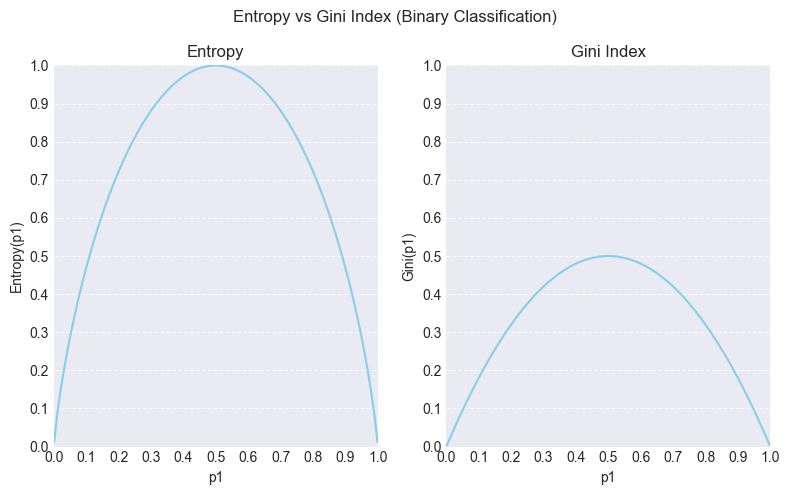

In [30]:
plt.style.use("seaborn-v0_8-dark")

X = np.linspace(0.001, 0.999, 100)
y_entropy = -X * np.log2(X) - (1 - X) * np.log2(1 - X)
y_gini = 1 - (X**2 + (1 - X)**2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
fig.suptitle("Entropy vs Gini Index (Binary Classification)")

axes[0].plot(X, y_entropy, color="skyblue")
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_yticks(np.arange(0, 1.1, 0.1))
axes[0].set_title("Entropy")
axes[0].set_xlabel("p1")
axes[0].set_ylabel("Entropy(p1)")
axes[0].grid(True, axis="y", linestyle="--", alpha=0.7)


axes[1].plot(X, y_gini, color="skyblue")
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))
axes[1].set_yticks(np.arange(0, 1.1, 0.1))
axes[1].set_title("Gini Index")
axes[1].set_xlabel("p1")
axes[1].set_ylabel("Gini(p1)")
axes[1].grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show();

### Building Decision Tree
#### ID3 (Iterative Dichotomiser 3)
The ID3 algorithm is specifically designed for building decision trees from a given dataset. Its primary objective is to construct a tree that best explains the relationship between attributes in the data and their corresponding class labels.
1. `Selecting the Best Attribute`
  - ID3 employs the concept of **entropy** and **information gain** to determine the attribute that best separates the data. Entropy measures the impurity or randomness in the dataset.
  - The algorithm calculates the entropy of each attribute and selects the one that results in the most significant information gain when used for splitting the data.
2. `Creating Tree Nodes`
  - The chosen attribute is used to split the dataset into subsets based on its distinct values.
  - For each subset, ID3 recurses to find the next best attribute to further partition the data, forming branches and new nodes accordingly.
3. `Stopping Criteria`
  - The recursion continues until one of the stopping criteria is met, such as when all instances in a branch belong to the same class or when all attributes have been used for splitting.
4. `Handling Missing Values`
  - ID3 can handle missing attribute values by employing various strategies like attribute mean/mode substitution or using majority class values.
5. `Tree Pruning`
  - Pruning is a technique to prevent overfitting. While not directly included in ID3, post-processing techniques or variations like C4.5 incorporate pruning to improve the tree's generalization.

**Advantages**
  - `Interpretability`: Decision trees generated by ID3 are easily interpretable, making them suitable for explaining decisions to non-technical stakeholders.
  - `Handles Categorical Data`: ID3 can effectively handle categorical attributes without requiring explicit data preprocessing steps.
  - `Computationally Inexpensive`: The algorithm is relatively straightforward and computationally less expensive compared to some complex models.

**Limitations**
  - `Overfitting`: ID3 tends to create complex trees that may overfit the training data, impacting generalization to unseen instances.
  - `Sensitive to Noise`: Noise or outliers in the data can lead to the creation of non-optimal or incorrect splits.
  - `Binary Trees Only`: ID3 constructs binary trees, limiting its ability to represent more complex relationships present in the data directly.

#### Code example

In [31]:
from collections import Counter

class DecisionTreeID3:
    def __init__(self, max_depth=None, min_samples_split=2, threshold=0.01, feature_names=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.threshold = threshold
        self.feature_names = feature_names
        self.tree = None
    
    # Compute entropy
    def _entropy(self, y):
        counts = Counter(y) # return a dictionary {key(label): value(quantity)}
        total = len(y)
        ent = 0
        for _, count in counts.items():
            p = count / total
            ent -= p * np.log2(p)
        return ent

    # Compute information gain for categorical
    def _information_gain_categorical(self, y, X_column): # X_column (feature)
        parent_entropy = self._entropy(y) # Compute entropy of root in subtree
        values, counts = np.unique(X_column, return_counts=True) 

        weighted_entropy = 0
        for v, c in zip(values, counts):
            y_sub = y[X_column == v]
            weighted_entropy += (c / len(X_column)) * self._entropy(y_sub)
        
        return parent_entropy - weighted_entropy, None
    
    # Compute information gain for numeric
    def _information_gain_numeric(self, y, X_column):
        parent_entropy = self._entropy(y)
        sort_idx = np.argsort(X_column)
        X_sorted, y_sorted = X_column[sort_idx], y[sort_idx]

        best_gain = 0
        best_threshold = None
        # Find the threshold that gives the best gain
        for i in range(1, len(X_sorted)):
            if X_sorted[i] == X_sorted[i-1]:
                continue
            threshold = (X_sorted[i] + X_sorted[i-1]) / 2

            left_y = y_sorted[X_sorted <= threshold]
            right_y = y_sorted[X_sorted > threshold]

            if len(left_y) == 0 or len(right_y) == 0:
                continue

            weight_entropy = (len(left_y) / len(y)) * self._entropy(left_y) + (len(right_y) / len(y)) * self._entropy(right_y)
            gain = parent_entropy - weight_entropy
            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_gain, best_threshold
    
    # Find best feature to split
    def _best_feature(self, X, y):
        n_features = X.shape[1]
        best_gain = 0
        best_feature = None
        best_threshold = None
        is_numeric = False
        
        for feature in range(n_features):
            col = X[:, feature]
            try:
                col_num = col.astype(float)
                gain, threshold = self._information_gain_numeric(y, col_num)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    is_numeric = True
            except ValueError:
                
                gain, _ = self._information_gain_categorical(y, col)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = None
                    is_numeric = False
        
        return best_feature, best_gain, best_threshold, is_numeric
        
    # build tree
    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1: # pure node
            return {"label": y[0]}
        if X.shape[1] == 0: 
            return {"label": Counter(y).most_common(1)[0][0]} # Counter(y).most_common(1)[0][0] return a tuple list 
        if self.max_depth is not None and depth >= self.max_depth:
            return {"label": Counter(y).most_common(1)[0][0]}
        if len(y) < self.min_samples_split:
            return {"label": Counter(y).most_common(1)[0][0]}
        

        best_feature, best_gain, best_threshold, is_numeric = self._best_feature(X, y)
        if best_gain <= self.threshold or best_feature is None:
            return {"label": Counter(y).most_common(1)[0][0]}

        tree = {"feature": best_feature, "branches": {}, "is_numeric": is_numeric}

        if is_numeric:
            tree["threshold"] = best_threshold
            col_num = X[:, best_feature].astype(float)
            left_idx = col_num <= best_threshold
            right_idx = col_num > best_threshold

            tree["branches"]["<="] = self._build_tree(X[left_idx], y[left_idx], depth+1)
            tree["branches"][">"] = self._build_tree(X[right_idx], y[right_idx], depth+1)
        else:
            # create branch
            values = np.unique(X[:, best_feature])
            for v in values:
                idx = (X[:, best_feature] == v)
                #X_sub = np.delete(X_sub, best_feature, axis=1)
                subtree = self._build_tree(X[idx], y[idx], depth + 1)
                tree["branches"][v] = subtree
        
        return tree
    
    def fit(self, X, y, feature_names=None):
        X = np.array(X, dtype=object)
        y = np.array(y)
        if feature_names is None:
            feature_names = [f"Feature {i}" for i in range(X.shape[1])]
        self.feature_names = feature_names
        self.tree = self._build_tree(X, y)

    # Collect all labels in subtree
    def _collect_labels(self, tree):
        if "label" in tree:
            return [tree["label"]]
        labels = []
        for branch in tree["branches"].values():
            labels.extend(self._collect_labels(branch))
        return labels

    def _predict_sample(self, x, tree):
        if "label" in tree:
            return tree["label"]
            
        feature = tree["feature"]

        if tree["is_numeric"]:
            threshold = tree["threshold"]
            if x[feature] <= threshold:
                return self._predict_sample(x, tree["branches"]["<="])
            else:
                return self._predict_sample(x, tree["branches"][">"])
        else:
            value = x[feature]

            if value in tree["branches"]:
                return self._predict_sample(x, tree["branches"][value])
            else:
                # fallback: choose majority label
                labels = self._collect_labels(tree)
                return Counter(labels).most_common(1)[0][0]

    
    def predict(self, X):
        X = np.array(X)
        return [self._predict_sample(x, self.tree) for x in X]
    
    def print_tree(self, tree=None, indent=""):
        if tree is None:
            tree = self.tree

        if "label" in tree:
            print(indent + "Label:", tree["label"])
            return

        feature = tree["feature"]
        name = self.feature_names[feature]

        if tree["is_numeric"]:
            print(indent + f"[{name} <= {tree['threshold']:.3f}]")
            print(indent + " └── <= :")
            self.print_tree(tree["branches"]["<="], indent + "     ")
            print(indent + " └── > :")
            self.print_tree(tree["branches"][">"], indent + "     ")
        else:
            print(indent + f"[{name}]")
            for value, branch in tree["branches"].items():
                print(indent + f" └── {value}:")
                self.print_tree(branch, indent + "     ")

In [32]:
# Dataset toy (Play Tennis
X = [
    ["Sunny", "Hot", "High", "Weak", 85, 10],
    ["Sunny", "Hot", "High", "Strong", 90, 15],
    ["Overcast", "Hot", "High", "Weak", 78, 8],
    ["Rain", "Mild", "High", "Weak", 96, 12],
    ["Rain", "Cool", "Normal", "Weak", 70, 7],
    ["Rain", "Cool", "Normal", "Strong", 65, 20],
    ["Overcast", "Cool", "Normal", "Strong", 72, 14],
    ["Sunny", "Mild", "High", "Weak", 80, 11],
    ["Sunny", "Mild", "Normal", "Weak", 68, 9],
    ["Sunny", "Cool", "Normal", "Strong", 75, 18],
    ["Overcast", "Mild", "High", "Strong", 88, 17],
    ["Overcast", "Mild", "Normal", "Weak", 60, 6],
    ["Rain", "Mild", "Normal", "Strong", 82, 16],
    ["Rain", "Hot", "High", "Weak", 95, 13],
    ["Sunny", "Hot", "Normal", "Weak", 72, 8],
    ["Sunny", "Cool", "High", "Strong", 66, 19],
    ["Overcast", "Hot", "Normal", "Weak", 74, 10],
    ["Rain", "Cool", "High", "Strong", 85, 21],
    ["Sunny", "Mild", "Normal", "Strong", 78, 12],
    ["Overcast", "Cool", "High", "Weak", 69, 7],
]

y = [
    "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No",
    "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "No",
    "Yes", "No", "Yes", "Yes"
]

feature_names = ["Outlook", "Temperature", "Humidity", "Wind", "HumidityNum", "WindSpeed"]

tree = DecisionTreeID3(max_depth=3)
tree.fit(X, y, feature_names=feature_names)

print("Pretty Tree:")
tree.print_tree()

print("Prediction:", tree.predict([
    ["Sunny", "Cool", "High", "Strong", 60, 18],   # numeric thấp
    ["Overcast", "Mild", "High", "Weak", 90, 9]    # numeric cao
]))

Pretty Tree:
[Outlook]
 └── Overcast:
     Label: Yes
 └── Rain:
     [WindSpeed <= 12.500]
      └── <= :
          Label: Yes
      └── > :
          Label: No
 └── Sunny:
     [Humidity]
      └── High:
          Label: No
      └── Normal:
          Label: Yes
Prediction: [np.str_('No'), np.str_('Yes')]


In [33]:
df = pd.DataFrame(X, columns=feature_names)
df["PlayTennis"] = y

In [34]:
print(df)

     Outlook Temperature Humidity    Wind  HumidityNum  WindSpeed PlayTennis
0      Sunny         Hot     High    Weak           85         10         No
1      Sunny         Hot     High  Strong           90         15         No
2   Overcast         Hot     High    Weak           78          8        Yes
3       Rain        Mild     High    Weak           96         12        Yes
4       Rain        Cool   Normal    Weak           70          7        Yes
5       Rain        Cool   Normal  Strong           65         20         No
6   Overcast        Cool   Normal  Strong           72         14        Yes
7      Sunny        Mild     High    Weak           80         11         No
8      Sunny        Mild   Normal    Weak           68          9        Yes
9      Sunny        Cool   Normal  Strong           75         18        Yes
10  Overcast        Mild     High  Strong           88         17        Yes
11  Overcast        Mild   Normal    Weak           60          6        Yes

In [35]:
label_encoders = {}

for col in ["Outlook", "Temperature", "Humidity", "Wind"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

sc = StandardScaler()
df[["HumidityNum", "WindSpeed"]] = sc.fit_transform(df[["HumidityNum", "WindSpeed"]])

In [36]:
print(df)

    Outlook  Temperature  Humidity  Wind  HumidityNum  WindSpeed PlayTennis
0         2            1         0     1     0.770314  -0.583475         No
1         2            1         0     0     1.277100   0.517422         No
2         0            1         0     1     0.060814  -1.023834        Yes
3         1            2         0     1     1.885243  -0.143117        Yes
4         1            0         1     1    -0.750043  -1.244014        Yes
5         1            0         1     0    -1.256828   1.618319         No
6         0            0         1     0    -0.547329   0.297242        Yes
7         2            2         0     1     0.263529  -0.363296         No
8         2            2         1     1    -0.952757  -0.803655        Yes
9         2            0         1     0    -0.243257   1.177960        Yes
10        0            2         0     0     1.074386   0.957780        Yes
11        0            2         1     1    -1.763614  -1.464193        Yes
12        1 

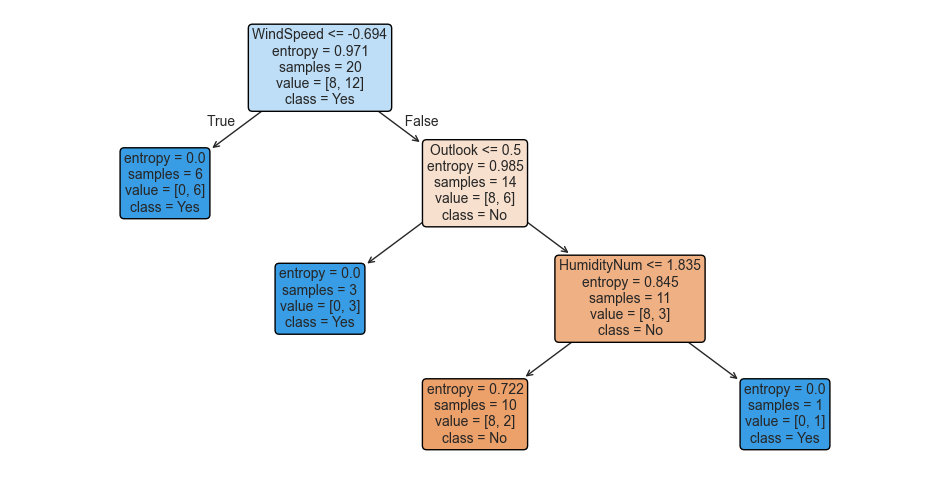

In [37]:
X = df[feature_names].values
y = df["PlayTennis"].values

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    min_samples_split=2
)

clf.fit(X, y)
plt.figure(figsize=(12, 6))

plot_tree(
    clf,
    feature_names=feature_names,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
);